Here, we need to analyse data from recordings. In particular, we should to measure amplitude ratio, decay time of 1 and 5 transporter

In [18]:
from IPython import get_ipython
get_ipython().magic('reset -sf') 

In [19]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
import seaborn as sns
import matplotlib.ticker as ticker
from statannot import add_stat_annotation

Step 1. Import data from excel to pandas df

In [20]:
def file_extraction(search_string, set): 
    filepaths = glob.glob(search_string) 
    df = pd.DataFrame()
    col_name_suffix = 1
    for find_files in filepaths:
        if set == 'ctrl':
            df = df.join (pd.read_excel(find_files, sheet_name='CTRL'), how='outer',lsuffix=col_name_suffix)
            col_name_suffix +=1
        else: 
            df = df.join (pd.read_excel(find_files, sheet_name='SE'), how='outer',lsuffix=col_name_suffix)
            col_name_suffix +=1
    return(df)

In [21]:
rec_count_CTRL= file_extraction('**/rec*.xlsx', set = 'ctrl')
rec_count_SE = file_extraction('**/rec*.xlsx', set = 'SE')
all_rec_count = pd.concat([rec_count_CTRL, rec_count_SE], ignore_index= True)
all_rec_count

,Unnamed: 0,IGluT(5),IGluT(1),τdecay IGluT(5),τdecay IGluT(1),Group
0,180720_017,-90.914145,-57.691506,12.338245,9.486606,Контроль
1,180720_020,-34.242714,-19.659381,14.291741,11.415268,Контроль
2,180724_015,-77.306295,-56.221680,11.211063,12.065621,Контроль
3,180725_005,-30.638028,-18.826480,10.472696,9.553450,Контроль
4,CTRL_FOR_OLGA_2,-9.960000,-8.280000,8.812230,8.371306,Контроль
5,CTRL_FOR_OLGA_7,-36.970280,-31.829147,8.737555,9.606447,Контроль
6,180726_003,-91.776505,-56.210698,7.922777,10.613816,ЭС
7,180730_018,-13.253472,-10.978978,16.032907,12.753625,ЭС
8,180801_003,-86.821285,-75.934856,15.438407,9.635286,ЭС
9,SE_FOR_OLGA_1,-36.970280,-31.829147,11.991837,9.605306,ЭС


Step 2. Calculate amplitude ratio and decay time

Calculate amplitude and decay time ratio as ratio IGluT(5) to IGluT(1)

In [22]:
all_rec_count ['IGluT(5)/IGluT(1)'] = all_rec_count['IGluT(5)']/all_rec_count['IGluT(1)']
all_rec_count ['τdecay IGluT(5)/τdecay IGluT(1)'] = all_rec_count['τdecay IGluT(5)']/all_rec_count['τdecay IGluT(1)']

In [23]:
all_rec_count

,Unnamed: 0,IGluT(5),IGluT(1),τdecay IGluT(5),τdecay IGluT(1),Group,IGluT(5)/IGluT(1),τdecay IGluT(5)/τdecay IGluT(1)
0,180720_017,-90.914145,-57.691506,12.338245,9.486606,Контроль,1.575867,1.300596
1,180720_020,-34.242714,-19.659381,14.291741,11.415268,Контроль,1.741800,1.251985
2,180724_015,-77.306295,-56.221680,11.211063,12.065621,Контроль,1.375026,0.929174
3,180725_005,-30.638028,-18.826480,10.472696,9.553450,Контроль,1.627390,1.096221
4,CTRL_FOR_OLGA_2,-9.960000,-8.280000,8.812230,8.371306,Контроль,1.202899,1.052671
5,CTRL_FOR_OLGA_7,-36.970280,-31.829147,8.737555,9.606447,Контроль,1.161523,0.909551
6,180726_003,-91.776505,-56.210698,7.922777,10.613816,ЭС,1.632723,0.746459
7,180730_018,-13.253472,-10.978978,16.032907,12.753625,ЭС,1.207168,1.257125
8,180801_003,-86.821285,-75.934856,15.438407,9.635286,ЭС,1.143365,1.602278
9,SE_FOR_OLGA_1,-36.970280,-31.829147,11.991837,9.605306,ЭС,1.161523,1.248460


In [24]:
def adjust_box_widths(g, fac): # from https://stackoverflow.com/questions/56838187/how-to-create-spacing-between-same-subgroup-in-seaborn-boxplot
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [25]:
def stat_to_list(stat): 
    l = []
    for i in stat:
        l.append(str(i).split(','))
    for i in range(len(l)):
            l[i][1] = l[i].extend(l[i][1].split())
            l[i][1]= l[i].extend(l[i][2].split('='))
            l[i][1]= l[i].extend(l[i][3].split('='))
            del l[i][1]
            del l[i][1]
            del l[i][1]
    return l

Transform df to create hue-groupped boxplot.

In [26]:
all_rec_count.drop(all_rec_count[all_rec_count['τdecay IGluT(5)']< 8].index, inplace=True) #delete outliers

all_rec_count_ampl = pd.melt (all_rec_count, id_vars= ['Group'], 
                            value_vars=['IGluT(1)','IGluT(5)'],
                            var_name= '', value_name= 'Амплитуда, pA')
all_rec_count_decay = pd.melt (all_rec_count, id_vars= ['Group'], 
                            value_vars=['τdecay IGluT(1)','τdecay IGluT(5)'],
                            var_name= '', value_name= 'τdecay, мс')
all_rec_count_ampl

,Group,,"Амплитуда, pA"
0,Контроль,IGluT(1),-57.691506
1,Контроль,IGluT(1),-19.659381
2,Контроль,IGluT(1),-56.221680
3,Контроль,IGluT(1),-18.826480
4,Контроль,IGluT(1),-8.280000
5,Контроль,IGluT(1),-31.829147
6,ЭС,IGluT(1),-10.978978
7,ЭС,IGluT(1),-75.934856
8,ЭС,IGluT(1),-31.829147
9,ЭС,IGluT(1),-39.123000


In [27]:
def boxplot_graph_hue(data, dots, fig_name, big_tick, ylim, xyhue, box_pairs): 
    fig_name = 'figs/recordings calculate/' + fig_name + '.tif'
    fig = plt.figure(figsize=(12,7)) # меняет размер графика
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(font_scale=1.4, style="ticks",context="poster", rc= custom_params)
    plot = sns.boxplot(data = data, x = xyhue[0], y = xyhue[1], hue = xyhue[2], 
                                            palette="vlag", linewidth = 7, dodge=True)
    
    plot.spines['left'].set_linewidth(4)
    plot.spines['bottom'].set_linewidth(4)
    plot.yaxis.set_major_locator(ticker.MultipleLocator(big_tick))
    plt.ylim(ylim)
    stat = add_stat_annotation(plot, data=data,x = xyhue[0], y = xyhue[1], hue = xyhue[2],
                    box_pairs=box_pairs,loc = 'outside',
                    test='Mann-Whitney', text_format='star',  verbose=1, comparisons_correction=None, linewidth=4) #loc = 'outside'
    if dots == True:
        sns.swarmplot(x = xyhue[0], y = xyhue[1], hue = xyhue[2], data=data, 
                                            size = 15, palette = "Set2", linewidth=4 ,dodge = True)
    handles, labels = plot.get_legend_handles_labels()
    plt.legend(handles[0:2], labels[0:2], loc=2, bbox_to_anchor=(1.03, 1), borderaxespad=0)
    adjust_box_widths(fig, 0.9)
    plot = plot.get_figure()
    plt.tight_layout()                                         
    plot.savefig(fig_name, dpi=800)
    return stat

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IGluT(5)_Контроль v.s. IGluT(5)_ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=5.830e-01 U_stat=1.150e+01
IGluT(1)_Контроль v.s. IGluT(1)_ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=1.000e+00 U_stat=1.550e+01


C:\Users\nosov\AppData\Local\Temp/ipykernel_19708/888465776.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


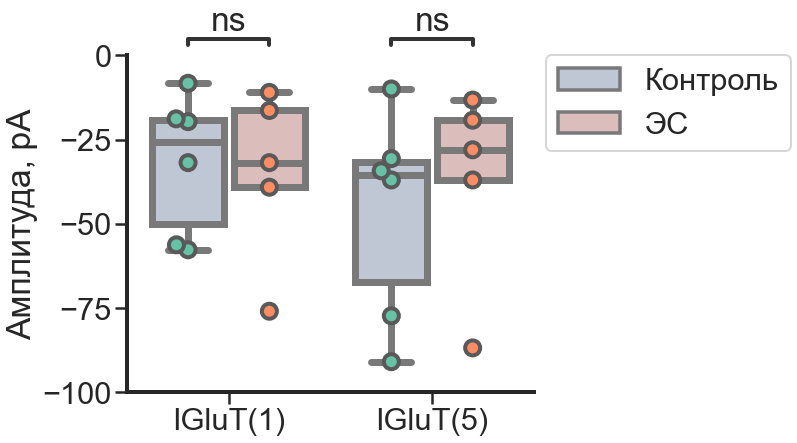

In [28]:
ax, stat  = boxplot_graph_hue(all_rec_count_ampl, dots = True, fig_name = 'амлитуды',big_tick = 25, ylim = [-100,0], 
                xyhue =['','Амплитуда, pA','Group'], box_pairs = [(('IGluT(1)', 'Контроль'),( 'IGluT(1)', 'ЭС')),
                                                                 (('IGluT(5)', 'Контроль'),('IGluT(5)', 'ЭС'))])
stat_list = []
stat_list.extend(stat_to_list(stat))   

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

τdecay IGluT(5)_Контроль v.s. τdecay IGluT(5)_ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=3.030e-02 U_stat=3.000e+00
τdecay IGluT(1)_Контроль v.s. τdecay IGluT(1)_ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=2.468e-01 U_stat=8.000e+00


C:\Users\nosov\AppData\Local\Temp/ipykernel_19708/888465776.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


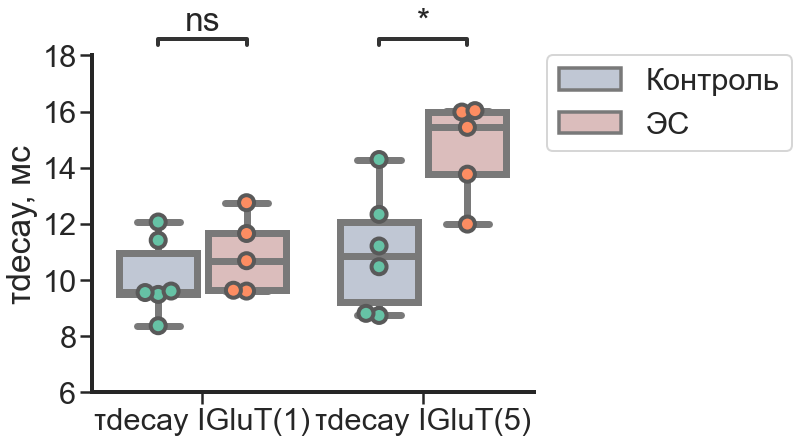

In [29]:

ax, stat = boxplot_graph_hue(all_rec_count_decay, dots = True, fig_name = 'время затухания',big_tick = 2, ylim = [6,18], 
                xyhue =['','τdecay, мс','Group'], box_pairs = [(('τdecay IGluT(1)', 'Контроль'),( 'τdecay IGluT(1)', 'ЭС')),
                                                                 (('τdecay IGluT(5)', 'Контроль'),('τdecay IGluT(5)', 'ЭС'))])
stat_list.extend(stat_to_list(stat))  

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Контроль v.s. ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=4.413e-02 U_stat=2.650e+01


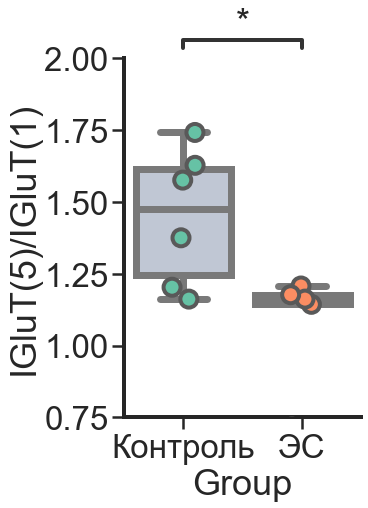

In [30]:
all_rec_count.drop(all_rec_count[all_rec_count['IGluT(5)/IGluT(1)']< 0.55].index, inplace=True) #удалим выбросы

fig = plt.figure(figsize=(6,8)) # меняет размер графика
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(font_scale=1.5, style="ticks",context="poster", rc= custom_params)
plot = sns.boxplot (data = all_rec_count, x=all_rec_count['Group'], y = all_rec_count['IGluT(5)/IGluT(1)'],  palette="vlag", linewidth = 7, dodge=True)
plot.spines['left'].set_linewidth(4)
plot.spines['bottom'].set_linewidth(4)
plot.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
plt.ylim([0.75,2])
ax, stat  = add_stat_annotation(plot, data = all_rec_count, x=all_rec_count['Group'], y = all_rec_count['IGluT(5)/IGluT(1)'],
                    box_pairs=[("Контроль", "ЭС")],loc = 'outside',
                    test='Mann-Whitney', text_format='star',  verbose=1, comparisons_correction=None, linewidth=4) #loc = 'outside'
sns.stripplot(data=all_rec_count, x=all_rec_count['Group'], y = all_rec_count['IGluT(5)/IGluT(1)'],
              size=17, linewidth=4,palette = "Set2", jitter = True)
plot = plot.get_figure()
plt.tight_layout() 
plot.savefig('figs/recordings calculate/отношения амплитуд', dpi=800)

stat_list.extend(stat_to_list(stat))  

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Контроль v.s. ЭС: Mann-Whitney-Wilcoxon test two-sided, P_val=8.225e-02 U_stat=5.000e+00


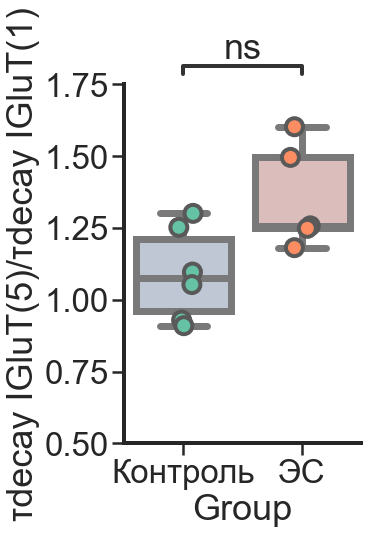

In [31]:
all_rec_count.drop(all_rec_count[all_rec_count['τdecay IGluT(5)/τdecay IGluT(1)']> 1.7].index, inplace=True) #удалим выбросы

fig = plt.figure(figsize=(6,8)) # меняет размер графика
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(font_scale=1.5, style="ticks",context="poster", rc= custom_params)
plot = sns.boxplot (data = all_rec_count, x=all_rec_count['Group'], y = all_rec_count['τdecay IGluT(5)/τdecay IGluT(1)'],  palette="vlag", linewidth = 7, dodge=True)
plot.spines['left'].set_linewidth(4)
plot.spines['bottom'].set_linewidth(4)
plot.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
plt.ylim([0.5,1.75])
ax, stat = add_stat_annotation(plot, data = all_rec_count, x=all_rec_count['Group'], y = all_rec_count['τdecay IGluT(5)/τdecay IGluT(1)'],
                    box_pairs=[("Контроль", "ЭС")],loc = 'outside',
                    test='Mann-Whitney', text_format='star',  verbose=1, comparisons_correction=None, linewidth=4) #loc = 'outside'
sns.stripplot(data=all_rec_count, x=all_rec_count['Group'], y = all_rec_count['τdecay IGluT(5)/τdecay IGluT(1)'],
              size=17, linewidth=4,palette = "Set2", jitter = True)
plot = plot.get_figure()
plt.tight_layout() 
plot.savefig('figs/recordings calculate/отношения времени затухания', dpi=800)

stat_list.extend(stat_to_list(stat))  

Create p-value containing df to export to excel

In [32]:
def df_pval_tramsform(stat_list):
    df_stat_out = pd.DataFrame(stat_list, columns = ['Test', 'feature', 'P-Val', 'feature2','U-stat'] ,index=['IGluT(5)', 'IGluT(1)', 'τdecay IGluT(5)', 'τdecay IGluT(1)','IGluT(5)/IGluT(1)', 'τd IGluT(5)/τd IGluT(1)'])
    df_stat_out.drop(['feature','feature2'], axis= 'columns', inplace= True)
    return df_stat_out

def df_out_tramsform(all_rec_count):
    mask_ctrl = all_rec_count['Group']=='Контроль'
    perc_cell_count_CTRL = all_rec_count[mask_ctrl].quantile([0.25, 0.50 , 0.75])
    mask_SE = all_rec_count['Group']=='ЭС'

    perc_cell_count_SE = all_rec_count[mask_SE].quantile([0.25, 0.50 , 0.75])
    perc_cell_count_CTRL ['Group'] = 'Контроль'
    perc_cell_count_SE ['Group'] = 'ЭС'
    perc_out = pd.concat([perc_cell_count_CTRL, perc_cell_count_SE])
    return perc_out 

In [33]:
df_stat_out = df_pval_tramsform(stat_list)
perc_out = df_out_tramsform(all_rec_count)

In [35]:
df_stat_out

,Test,P-Val,U-stat
IGluT(5),Mann-Whitney-Wilcoxon test two-sided,5.830e-01,1.150e+01
IGluT(1),Mann-Whitney-Wilcoxon test two-sided,1.000e+00,1.550e+01
τdecay IGluT(5),Mann-Whitney-Wilcoxon test two-sided,3.030e-02,3.000e+00
τdecay IGluT(1),Mann-Whitney-Wilcoxon test two-sided,2.468e-01,8.000e+00
IGluT(5)/IGluT(1),Mann-Whitney-Wilcoxon test two-sided,4.413e-02,2.650e+01
τd IGluT(5)/τd IGluT(1),Mann-Whitney-Wilcoxon test two-sided,8.225e-02,5.000e+00


In [36]:
perc_out

,IGluT(5),IGluT(1),τdecay IGluT(5),τdecay IGluT(1),IGluT(5)/IGluT(1),τdecay IGluT(5)/τdecay IGluT(1),Group
0.25,-67.222291,-50.123547,9.227346,9.503317,1.245931,0.960048,Контроль
0.50,-35.606497,-25.744264,10.841880,9.579948,1.475447,1.074446,Контроль
0.75,-31.539199,-19.034705,12.056450,10.963063,1.614509,1.213044,Контроль
0.25,-36.970280,-39.123000,13.769533,9.635286,1.143365,1.248460,ЭС
0.50,-28.020000,-31.829147,15.438407,10.686977,1.161523,1.257125,ЭС
0.75,-19.232800,-16.343553,15.982102,11.656765,1.176782,1.495475,ЭС


In [34]:
with pd.ExcelWriter('output_table/final_out_rec_count.xlsx') as writer:  
     perc_out.to_excel(writer, sheet_name='Percentiles', float_format="%.2f")
     df_stat_out.to_excel(writer, sheet_name='P-val, MW(U)', float_format="%.2f")

Profit!